In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot
from IPython.display import Image, display
import time

# Model Definition


In [4]:
class FeedForward(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        return self.layer3(x)

In [5]:
model = FeedForward()

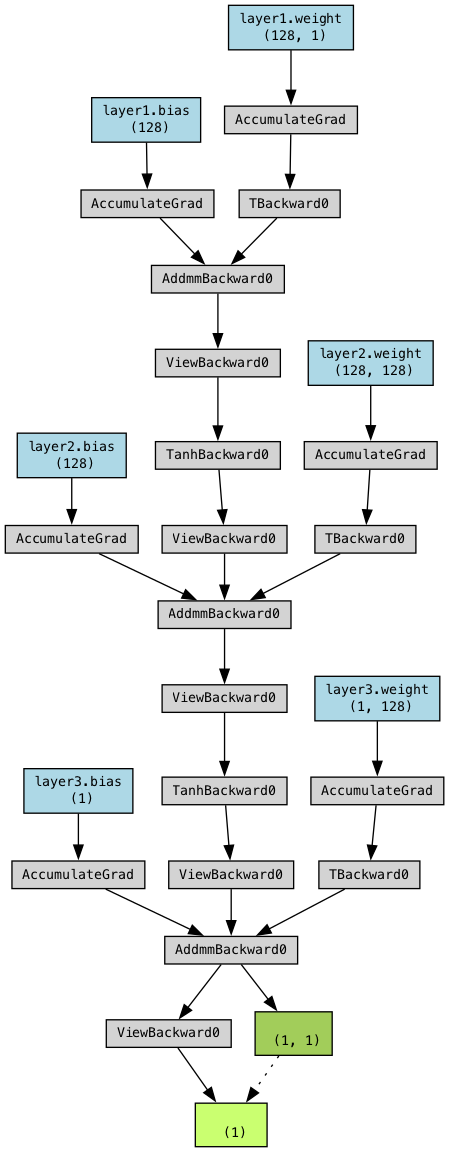

In [6]:
def display_model(model):
    sample_input = torch.randn(1)
    output = model(sample_input)
    dot = make_dot(output, params=dict(model.named_parameters()))
    dot.render("simple_ffn_graph", format="png")
    display(Image(filename="simple_ffn_graph.png"))


display_model(model)

# Sampling a Function


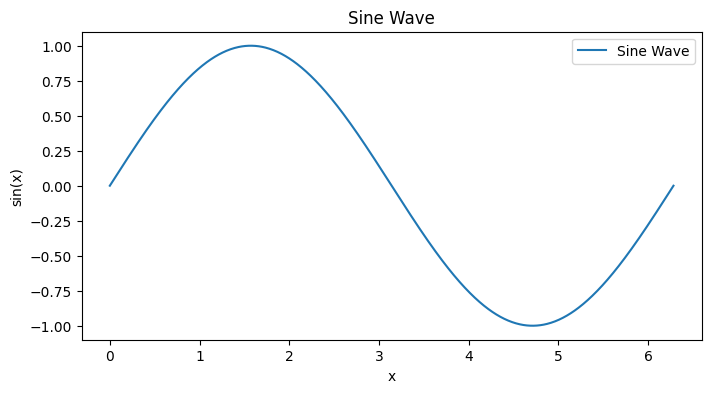

In [7]:
# Generate sine wave data
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Display the sine wave
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Sine Wave")
plt.title("Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

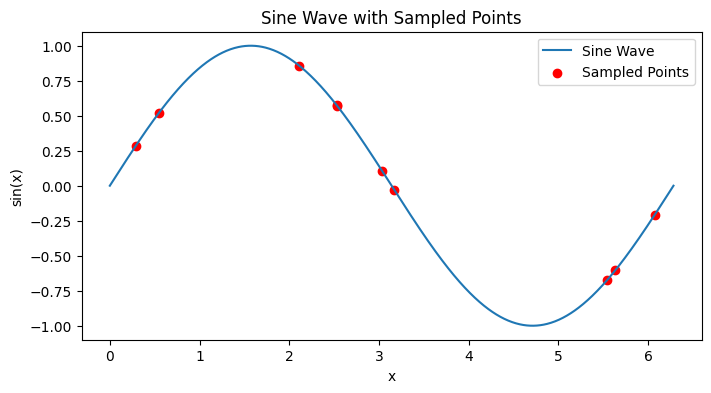

In [8]:
N_SAMPLES = 10

# Sample 100 points from the sine wave data
sample_indices = np.random.choice(len(x), size=N_SAMPLES, replace=False)
x_sample = x[sample_indices]
y_sample = y[sample_indices]

# Plot the sampled points on top of the sine wave
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Sine Wave")
plt.scatter(x_sample, y_sample, color="red", label="Sampled Points")
plt.title("Sine Wave with Sampled Points")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()

In [9]:
# Convert sampled data to tensors
x_train = torch.tensor(x_sample, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y_sample, dtype=torch.float32).unsqueeze(1)

In [10]:
print(x_train)

tensor([[2.1133],
        [2.5347],
        [2.5284],
        [0.2893],
        [3.0378],
        [5.5473],
        [6.0756],
        [0.5472],
        [3.1699],
        [5.6354]])


In [11]:
print(y_train)

tensor([[ 0.8564],
        [ 0.5704],
        [ 0.5755],
        [ 0.2853],
        [ 0.1036],
        [-0.6712],
        [-0.2061],
        [ 0.5203],
        [-0.0283],
        [-0.6034]])


In [ ]:
model = SimpleFFN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
EPOCHS = 400
losses = []

for epoch in range(EPOCHS):
    # Prep for next loop
    model.train()
    optimizer.zero_grad()

    # Compute predictions at sampled points
    outputs = model(x_train)

    # How far off are we?
    loss = criterion(outputs, y_train)

    # Correct weights
    loss.backward()
    optimizer.step()

    # Store losses for plotting
    losses.append(loss.item())

    print(f"Epoch {epoch + 1}/{EPOCHS}, Loss: {loss.item():.6f}")


Epoch 1/400, Loss: 0.000001
Epoch 2/400, Loss: 0.005573
Epoch 3/400, Loss: 0.104671
Epoch 4/400, Loss: 0.004367
Epoch 5/400, Loss: 0.044493
Epoch 6/400, Loss: 0.061157
Epoch 7/400, Loss: 0.018345
Epoch 8/400, Loss: 0.000972
Epoch 9/400, Loss: 0.024794
Epoch 10/400, Loss: 0.035841
Epoch 11/400, Loss: 0.017728
Epoch 12/400, Loss: 0.000987
Epoch 13/400, Loss: 0.006095
Epoch 14/400, Loss: 0.019362
Epoch 15/400, Loss: 0.019134
Epoch 16/400, Loss: 0.007335
Epoch 17/400, Loss: 0.000419
Epoch 18/400, Loss: 0.005238
Epoch 19/400, Loss: 0.012191
Epoch 20/400, Loss: 0.010849
Epoch 21/400, Loss: 0.003693
Epoch 22/400, Loss: 0.000179
Epoch 23/400, Loss: 0.003474
Epoch 24/400, Loss: 0.007404
Epoch 25/400, Loss: 0.006115
Epoch 26/400, Loss: 0.001741
Epoch 27/400, Loss: 0.000130
Epoch 28/400, Loss: 0.002535
Epoch 29/400, Loss: 0.004680
Epoch 30/400, Loss: 0.003410
Epoch 31/400, Loss: 0.000759
Epoch 32/400, Loss: 0.000311
Epoch 33/400, Loss: 0.002062
Epoch 34/400, Loss: 0.002977
Epoch 35/400, Loss: 0.0

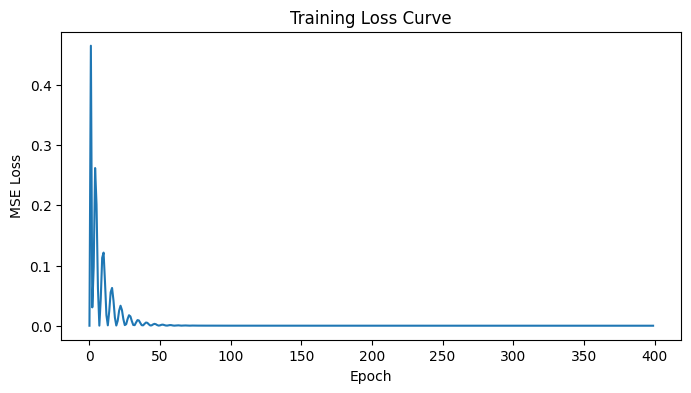

In [18]:
# Plot loss curve
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

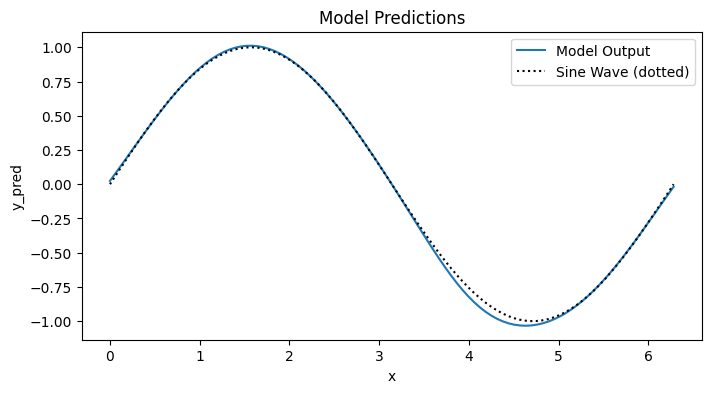

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate inputs from 0 to 2pi
x_test = np.linspace(0, 2 * np.pi, 100)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)

# Get model predictions
model.eval()
with torch.no_grad():
    y_pred = model(x_test_tensor).squeeze().numpy()

# Display the model outputs with matplotlib and plot sine wave for comparison
plt.figure(figsize=(8, 4))
plt.plot(x_test, y_pred, label="Model Output")
plt.plot(x_test, np.sin(x_test), "k:", label="Sine Wave (dotted)")
plt.title("Model Predictions")
plt.xlabel("x")
plt.ylabel("y_pred")
plt.legend()
plt.show()